In [348]:
import pandas as pd
import matplotlib.pyplot as plt


In [349]:
df1 = pd.read_excel("datasets/Aracaju.xlsx")
df2 = pd.read_excel("datasets/Fortaleza.xlsx")
df3 = pd.read_excel("datasets/Natal.xlsx")
df4 = pd.read_excel("datasets/Recife.xlsx")
df5 = pd.read_excel("datasets/Salvador.xlsx")

df = pd.concat([df1, df2, df3, df4, df5])


In [350]:
df.columns


Index(['Cidade', 'Data', 'Vendas', 'LojaID', 'Qtde'], dtype='object')

In [351]:
df.head(10)


,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8
5,Aracaju,2018-01-01,156.20,1522,1
6,Aracaju,2018-01-01,35.50,1522,2
7,Aracaju,2019-01-01,172.22,1522,6
8,Aracaju,2019-01-01,12.16,1523,1
9,Aracaju,2019-01-01,149.36,1523,3


In [352]:
df.tail(10)


,Cidade,Data,Vendas,LojaID,Qtde
230,Salvador,2019-01-03,184.69,1036,1
231,Salvador,2019-01-03,89.85,1034,2
232,Salvador,2019-01-03,167.76,1034,3
233,Salvador,2019-01-03,172.40,1036,2
234,Salvador,2019-01-03,48.39,1035,2
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [353]:
df.sample(10)


,Cidade,Data,Vendas,LojaID,Qtde
133,Natal,2019-01-02,153.71,1035,1
202,Salvador,2019-01-02,22.45,1036,1
95,Aracaju,2018-01-01,127.43,1522,9
127,Fortaleza,2019-03-02,39.56,982,8
28,Recife,2019-01-01,123.69,983,3
118,Fortaleza,2019-03-02,17.70,981,5
33,Salvador,2019-01-01,144.19,1035,2
20,Aracaju,2018-01-01,39.86,1522,9
126,Salvador,2019-03-02,41.69,1036,2
239,Natal,2019-01-03,161.41,1037,3


In [354]:
df.shape


(894, 5)

In [355]:
df.dtypes


Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [356]:
df["LojaID"] = df["LojaID"].astype("object")


In [357]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [358]:
df.isnull().sum()


Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [359]:
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)


In [360]:
df.isnull().sum()


Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [361]:
df["Vendas"].fillna(0, inplace=True)


In [362]:
df.dropna(inplace=True)


In [363]:
df.dropna(subset=["Vendas"], inplace=True)


In [364]:
df.dropna(how="all", inplace=True)


In [365]:
df["Receita"] = df["Vendas"].mul(df["Qtde"])
df.head()


,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [366]:
df["Receita/Vendas"] = df["Receita"]/df["Vendas"]
df.head()


,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [367]:
df["Receita"].max()


3544.0

In [368]:
df["Receita"].min()


3.34

In [369]:
df.nlargest(5, "Receita")


,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0


In [370]:
df.nsmallest(5, "Receita")


,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0
92,Salvador,2019-01-01,4.57,1035,1,4.57,1.0
95,Natal,2019-01-02,5.13,1035,1,5.13,1.0


In [371]:
df.sort_values("Receita", ascending=False).head(10)


,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


In [372]:
df.describe()


,Vendas,Qtde,Receita,Receita/Vendas
count,894.000000,894.000000,894.000000,894.000000
mean,122.611801,3.261745,387.497740,3.261745
std,166.818723,2.096964,575.518524,2.096964
min,3.010000,1.000000,3.340000,1.000000
25%,22.380000,2.000000,63.540000,2.000000
50%,44.000000,3.000000,155.560000,3.000000
75%,160.925000,4.000000,458.310000,4.000000
max,886.000000,10.000000,3544.000000,10.000000


In [373]:
df["Data"] = df["Data"].astype("int64")
df.dtypes


Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [374]:
df["Data"] = pd.to_datetime(df["Data"])
df.dtypes


Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [375]:
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [376]:
df["Ano_Venda"] = df["Data"].dt.year
df.sample(10)


,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
77,Recife,2019-01-01,102.82,981,6,616.92,6.0,2019
74,Natal,2019-03-10,303.00,854,3,909.00,3.0,2019
234,Salvador,2019-01-03,48.39,1035,2,96.78,2.0,2019
175,Natal,2019-01-02,16.53,1036,2,33.06,2.0,2019
96,Aracaju,2018-01-01,85.92,1521,2,171.84,2.0,2018
173,Salvador,2019-01-02,31.77,1034,2,63.54,2.0,2019
17,Natal,2018-02-18,276.00,854,3,828.00,3.0,2018
136,Salvador,2019-03-02,13.81,1036,1,13.81,1.0,2019
129,Salvador,2019-03-02,125.66,1037,1,125.66,1.0,2019
39,Fortaleza,2019-01-01,176.51,1005,1,176.51,1.0,2019


In [377]:
df["Mes_Venda"], df["Dia_Venda"] = (df["Data"].dt.month, df["Data"].dt.day)
df.sample(10)


,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda
104,Fortaleza,2019-01-01,40.50,1005,2,81.00,2.0,2019,1,1
21,Aracaju,2018-01-01,37.36,1520,2,74.72,2.0,2018,1,1
77,Fortaleza,2019-01-01,167.64,1005,1,167.64,1.0,2019,1,1
124,Fortaleza,2019-03-02,47.98,983,7,335.86,7.0,2019,3,2
124,Recife,2019-03-02,47.98,983,7,335.86,7.0,2019,3,2
113,Salvador,2019-03-02,18.90,1034,3,56.70,3.0,2019,3,2
96,Fortaleza,2019-01-01,23.31,1004,4,93.24,4.0,2019,1,1
124,Salvador,2019-03-02,44.82,1034,3,134.46,3.0,2019,3,2
188,Natal,2019-01-02,178.11,1035,3,534.33,3.0,2019,1,2
235,Natal,2019-01-03,41.84,1034,1,41.84,1.0,2019,1,3


In [378]:
df["Diferenca_dias"] = df["Data"] - df["Data"].min()
df.sample(10)


,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_dias
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days
117,Fortaleza,2019-03-02,15.42,983,8,123.36,8.0,2019,3,2,425 days
162,Salvador,2019-01-02,23.08,1036,2,46.16,2.0,2019,1,2,366 days
8,Fortaleza,2019-02-11,37.49,1005,1,37.49,1.0,2019,2,11,406 days
68,Natal,2018-06-22,274.00,852,3,822.00,3.0,2018,6,22,172 days
41,Aracaju,2018-01-01,229.64,1520,8,1837.12,8.0,2018,1,1,0 days
77,Fortaleza,2019-01-01,167.64,1005,1,167.64,1.0,2019,1,1,365 days
29,Recife,2019-01-01,10.18,980,8,81.44,8.0,2019,1,1,365 days
181,Natal,2019-01-02,244.83,1037,2,489.66,2.0,2019,1,2,366 days
85,Fortaleza,2019-01-01,149.00,1005,3,447.00,3.0,2019,1,1,365 days


In [379]:
df["Trimestre_Venda"] = df["Data"].dt.quarter
df.sample(10)


,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_dias,Trimestre_Venda
33,Recife,2019-01-01,32.33,982,1,32.33,1.0,2019,1,1,365 days,1
45,Natal,2019-03-11,431.00,852,3,1293.00,3.0,2019,3,11,434 days,1
5,Natal,2019-03-30,674.00,854,2,1348.00,2.0,2019,3,30,453 days,1
176,Salvador,2019-01-02,19.42,1035,3,58.26,3.0,2019,1,2,366 days,1
211,Salvador,2019-01-02,141.05,1035,3,423.15,3.0,2019,1,2,366 days,1
98,Recife,2019-01-01,137.34,981,8,1098.72,8.0,2019,1,1,365 days,1
150,Salvador,2019-01-02,11.13,1035,2,22.26,2.0,2019,1,2,366 days,1
18,Recife,2019-01-01,49.40,980,5,247.00,5.0,2019,1,1,365 days,1
12,Fortaleza,2019-01-01,80.73,1004,2,161.46,2.0,2019,1,1,365 days,1
85,Salvador,2019-01-01,16.88,1035,3,50.64,3.0,2019,1,1,365 days,1


In [380]:
vendas_marco_2019 = df.loc[(df["Data"].dt.year == 2019)
                           & (df["Data"].dt.month == 3)]
vendas_marco_2019


,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_dias,Trimestre_Venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


In [381]:
df.describe()


,Vendas,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_dias,Trimestre_Venda
count,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894,894.000000
mean,122.611801,3.261745,387.497740,3.261745,2018.815436,1.521253,2.890380,315 days 02:49:07.651006712,1.057047
std,166.818723,2.096964,575.518524,2.096964,0.388160,1.285241,4.648117,139 days 18:23:56.786455552,0.334789
min,3.010000,1.000000,3.340000,1.000000,2018.000000,1.000000,1.000000,0 days 00:00:00,1.000000
25%,22.380000,2.000000,63.540000,2.000000,2019.000000,1.000000,1.000000,365 days 00:00:00,1.000000
50%,44.000000,3.000000,155.560000,3.000000,2019.000000,1.000000,2.000000,365 days 00:00:00,1.000000
75%,160.925000,4.000000,458.310000,4.000000,2019.000000,1.000000,2.000000,366 days 00:00:00,1.000000
max,886.000000,10.000000,3544.000000,10.000000,2019.000000,12.000000,31.000000,459 days 00:00:00,4.000000


<AxesSubplot:>

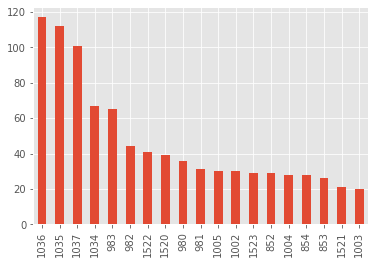

In [382]:
df["LojaID"].value_counts(ascending=False).plot.bar()


<AxesSubplot:>

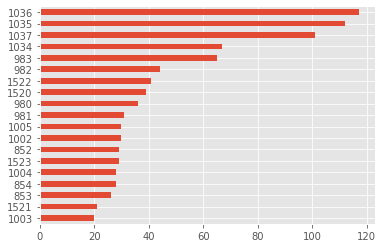

In [383]:
df["LojaID"].value_counts(ascending=True).plot.barh()


<AxesSubplot:ylabel='Receita'>

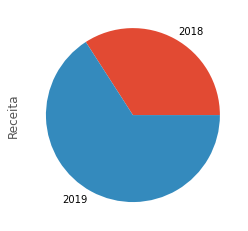

In [384]:
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()


Text(0, 0.5, 'Total')

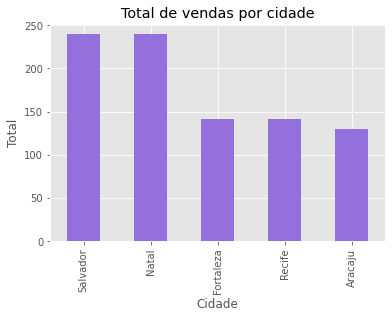

In [385]:
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color="mediumpurple")
plt.xlabel("Cidade")
plt.ylabel("Total")


In [386]:
plt.style.use("ggplot")


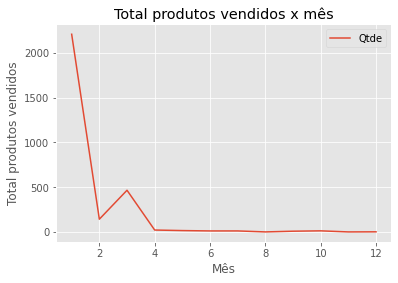

In [387]:
df.groupby(df["Mes_Venda"])["Qtde"].sum().plot(title="Total produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total produtos vendidos")
plt.legend()


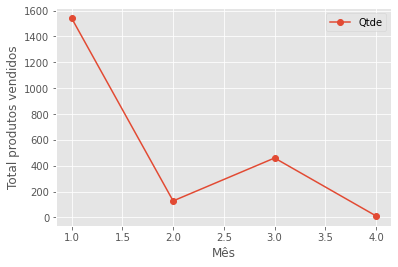

In [388]:
df_2019 = df[df["Ano_Venda"] == 2019]
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker="o")
plt.xlabel("Mês")
plt.ylabel("Total produtos vendidos")
plt.legend()
plt.savefig("Gráfico QTDE x MÊS.png")


(array([191., 193., 221.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

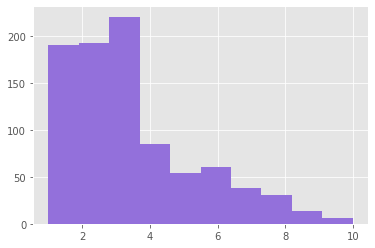

In [389]:
plt.hist(df["Qtde"], color="mediumpurple")


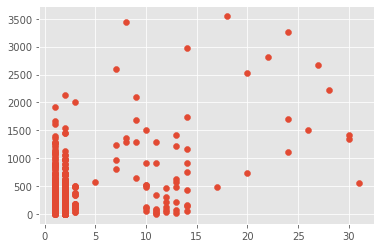

In [390]:
plt.scatter(x=df_2019["Dia_Venda"], y=df_2019["Receita"])
